# Рубежный контроль №2
## Киреев Андрей ИУ5-64Б
Задание. Для заданного набора данных (googleplaystore.csv) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (1:Линейная/логистическая регрессия, 2:Градиентный бустинг). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

Проведем предварительную подготовку датасета: удаление пропусков + кодирование категориальных признаков

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/googleplaystore.csv")

In [ ]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
data = data.dropna(axis=0)
data.shape


(9360, 13)

Типы переменных в датасете до обработки

In [ ]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Кодируем категориальные признаки в числовые:

In [ ]:
for i in range(data.shape[0]):
    data["Reviews"].iloc[i] = int(data["Reviews"].iloc[i])
    str = data["Installs"].iloc[i][:-1]
    data["Installs"].iloc[i] = int(str.replace(",", ""))
    if data["Price"].iloc[i] != "0":
        data["Price"].iloc[i] = data["Price"].iloc[i][1:]
        data["Price"].iloc[i] = float(data["Price"].iloc[i])
    else:
        data["Price"].iloc[i] = 0
data = data.astype({"Reviews": "int64"})
data = data.astype({"Installs": "int64"})
data = data.astype({"Price":"float64"})

leType = LabelEncoder()
le_arr = leType.fit_transform(data["Type"])
data["Type"] = le_arr
data = data.astype({"Type":"int64"})

leContent = LabelEncoder()
le_arr = leContent.fit_transform(data["Content Rating"])
data["Content Rating"] = le_arr
data["Content Rating"].unique()
data = data.astype({"Content Rating":"int64"})

leCategory = LabelEncoder()
le_arr = leCategory.fit_transform(data["Category"])
data["Category"] = le_arr
data["Category"].unique()
data = data.astype({"Category":"int64"})

leGenres = LabelEncoder()
le_arr = leGenres.fit_transform(data["Genres"])
data["Genres"] = le_arr
data["Genres"].unique()
data = data.astype({"Genres":"int64"})

leSize = LabelEncoder()
le_arr = leSize.fit_transform(data["Size"])
data["Size"] = le_arr
data["Size"].unique()
data = data.astype({"Size":"int64"})

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Название приложения, дата его обновления и версии андроида - признаки с большим количеством уникальных значений, не нужные для исследований. Удалим их.

In [ ]:
data2 = data.drop(["App", "Last Updated", "Current Ver", "Android Ver"], axis=1)

In [ ]:
data2.dtypes

Category            int64
Rating            float64
Reviews             int64
Size                int64
Installs            int64
Type                int64
Price             float64
Content Rating      int64
Genres              int64
dtype: object

Построим матрицу корреляции:

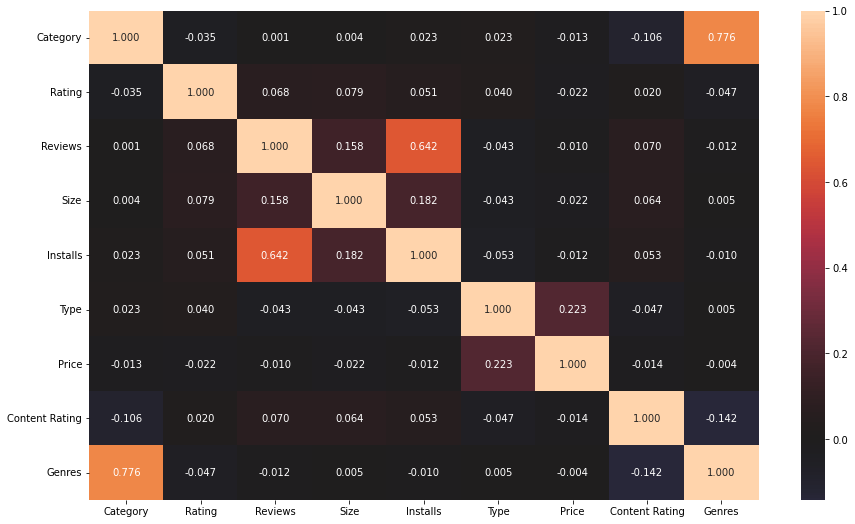

In [ ]:
fig, ax = plt.subplots(figsize=(15,9))
sns.heatmap(data2.corr(method="pearson"), ax=ax,annot=True, fmt=".3f", center=0)

В качестве целевого признака возьмём столбец "Genres" - жанры игр в Google Play Store

In [ ]:
#Разделение выборки на обучающую и тестовую
target = "Genres"
xArray = data2.drop(target, axis=1)
yArray = data2[target]
trainX, testX, trainY, testY = train_test_split(xArray, yArray, test_size=0.2, random_state=1)

### Линейная регрессия
Будем использовать функцию LinearRegression() из библиотеки ScikitLearn

In [ ]:
LR = LinearRegression()
LR.fit(trainX, trainY)

LinearRegression()

Для оценки качетсва модели будем использовать следующие метрики:

1) Коэффициента детерминации - чтобы определить насколько качественна модель для обучения. Коэффициент детерминации показывает долю вариации результативного признака, находящегося под воздействием изучаемых факторов, т. е. определяет, какая доля вариации признака Y учтена в модели и обусловлена влиянием на него факторов, включенных в модель. Чем ближе к r2 к 1, тем выше качество модели. 

2) Корень из средней квадратичной ошибки - чтобы определить разброс ошибок в предсказании модели. RMSE - это способ измерения того, насколько хорошо наша прогностическая модель по сравнению с фактическими данными, чем меньше RMSE, тем лучше способ поведения модели

In [ ]:
R2_LR = r2_score(testY, LR.predict(testX))
RMSE_LR = mean_squared_error(testY, LR.predict(testX), squared=True)

In [ ]:
print("Коэфф. детерминации: {}".format(R2_LR))
print("Среднеквадратическая ошибка (RMSE): {}".format(RMSE_LR))

Коэфф. детерминации: 0.5943559539032288
Среднеквадратическая ошибка (RMSE): 431.5223920437256


### Градиентный бустинг для регрессии
Будем использовать функцию GradientBoostingRegressor из библиотеки ScikitLearn

In [ ]:
GB = GradientBoostingRegressor(n_estimators=10, random_state=1)
GB.fit(trainX, trainY)

GradientBoostingRegressor(n_estimators=10, random_state=1)

In [ ]:
R2_GB = r2_score(testY, GB.predict(testX))
RMSE_GB= mean_squared_error(testY, GB.predict(testX), squared=True)

In [ ]:
print("Коэфф. детерминации: {}".format(R2_GB))
print("Среднеквадратическая ошибка (RMSE): {}".format(RMSE_GB))

Коэфф. детерминации: 0.6050155370636838
Среднеквадратическая ошибка (RMSE): 420.18277331186016


Вывод: из проведенных методов очевидно, что метод Градиентного бустинга не сильно отличается от Линейной регрессии, однако все же показывает лучшие результаты. Оба метода показывают средний коэффициент детерминации, а это значит, что мы не можем точно сказать, о высококачественности модели или о ее непригодности. Однако в обоих методах Среднекватическая ошибка достаточно велика.